<a href="https://colab.research.google.com/github/gabrieldepaiva/ProjetosParalelos/blob/main/Analise_Carteira_de_Acoes_Pessoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas Necessárias

In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt

## Escolha dos ativos que compõem a carteira

In [2]:
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:')
print('')
# Código Base para incluir os ativos na carteira
opcao = 1
carteira = []

carteira.append(input('Digite o nome do ativo. - '))
opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))

while True:
  if opcao == 1:
    carteira.append(input('Digite o nome do ativo. - '))
    opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))
  elif opcao != 1 and opcao != 2:
    opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
  else:
    break

print('')
print(f'Sua carteira é composta pelos seguintes ativos: {carteira}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:

Digite o nome do ativo. - TAEE11.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - BEES3.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 2

Sua carteira é composta pelos seguintes ativos: ['TAEE11.SA', 'BEES3.SA']


## Atribuição dos Pesos para esses Ativos

In [3]:
lista = [carteira]

pesos = []

try:
  for loc, ativo in enumerate(carteira):
    pesos.append(float(input(f'Escreva o peso do ativo {carteira[loc]} (somente o número) - '))/100)
except:
  print('')
  print('\033[31mO valor digitado resultou em um erro.\033[m')
  print('Favor executar esta célula novamente!')

# pode ser que não precise dessa parte do código
else:
  if sum(pesos) != 1:
    print('')
    print(f'\033[31mA soma dos pesos resultou em {sum(pesos)*100}%, a soma deve ser 100%!\033[31m')
    print('Favor executar esta célula novamente!')

Escreva o peso do ativo TAEE11.SA (somente o número) - 75
Escreva o peso do ativo BEES3.SA (somente o número) - 25


## Importação da base de dados com as cotações diárias do Yahoo Finance

In [4]:
inicio = input('A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> ')

BaseDados = pd.DataFrame()

for acao in carteira:
  BaseDados[acao] = data.DataReader(acao, data_source = 'yahoo',start = inicio)['Adj Close']

print('')
print('Importação dos dados realizada com sucesso!')

A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> 2020-6-1

Importação dos dados realizada com sucesso!


In [5]:
# Resultado da tabela que foi gerada parcialmente
BaseDados.head()

,TAEE11.SA,BEES3.SA
Date,,
2020-06-01,26.889908,5.351401
2020-06-02,26.917755,5.548505
2020-06-03,26.648579,5.883584
2020-06-04,26.230888,5.844162
2020-06-05,26.852781,6.001847


## Inclusão da coluna com o retorno diário da carteira 

In [6]:
# Retorno acumulado de cada ação

retorno_acumulado = ((BaseDados/BaseDados.iloc[0])-1)*100

In [7]:
w = np.array(pesos)

ValorTotal = (retorno_acumulado * w)
ValorTotal['Retorno'] = ValorTotal.sum(axis=1)
ValorTotal.tail()

,TAEE11.SA,BEES3.SA,Retorno
Date,,,
2020-12-10,17.027518,-1.034312,15.993206
2020-12-11,19.081822,-0.754012,18.327810
2020-12-14,18.831979,-0.847445,17.984534
2020-12-15,18.332283,-0.847445,17.484838
2020-12-16,18.827021,-0.800730,18.026292


## Inclusão dos dados do Benchmark - Ibovespa

In [8]:
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC')
print('')

benchmarks = []

q = 's'

q = input('Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - ')
if q == 's':

  # inclusão dos benchmarks
  escolha = 1

  benchmarks.append(input('Digite o código do benchmark. - '))
  escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))

  while True:
    if escolha == 1:
      benchmarks.append(input('Digite o nome do benchmark. - '))
      escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))
    elif opcao != 1 and opcao != 2:
      opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
    else:
      break

  print('')
  print(f'Os seguintes benchmarks foram incluídos : {benchmarks}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC

Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - s
Digite o código do benchmark. - ^BVSP
Deseja adicionar outro? [1] Sim / [2] Não - 2

Os seguintes benchmarks foram incluídos : ['^BVSP']


In [9]:
#Os dados referentes aos benchmarks escolhidos serão importados para posterior análise

BaseDados2 = pd.DataFrame()

for indice in benchmarks:
  BaseDados2[indice] = data.DataReader(indice, data_source = 'yahoo',start = inicio)['Adj Close']

bmk_var_acum = ((BaseDados2/BaseDados2.iloc[0])-1)*100

print('Importação dos dados realizada com sucesso!')

Importação dos dados realizada com sucesso!


In [10]:
# Criação da tabela com o retorno acumulado da carteira e dos benchmarks selecionados

tabela_final = pd.DataFrame()

tabela_final['Sua Carteira'] = ValorTotal['Retorno']

for i in benchmarks:
  tabela_final[i] = bmk_var_acum[i]

In [85]:
tabela_final.tail()

,Sua Carteira,^BVSP
Date,,
2020-12-10,15.993206,29.758520
2020-12-11,18.327810,30.132024
2020-12-14,17.984534,29.739336
2020-12-15,17.484838,31.060709
2020-12-16,18.026292,32.902958


## Visualizações e Análises dos Dados Importados e Normalizados

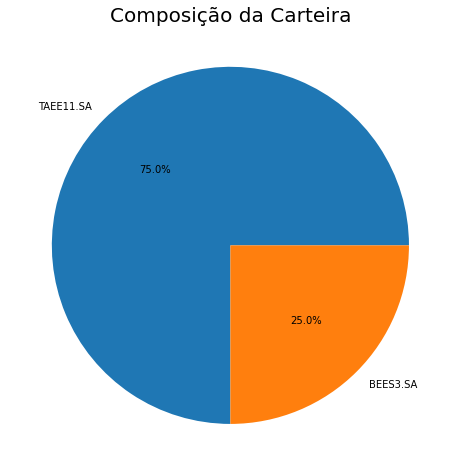

In [75]:
# Visualização da Representatividade na carteira
listafinal = []

for numero in pesos:
  listafinal.append(numero * 200)

listafinal

x_list = listafinal
labels_list = carteira
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.pie(x_list,autopct='%1.1f%%',labels=labels_list)
plt.title('Composição da Carteira',size=20)
print('')

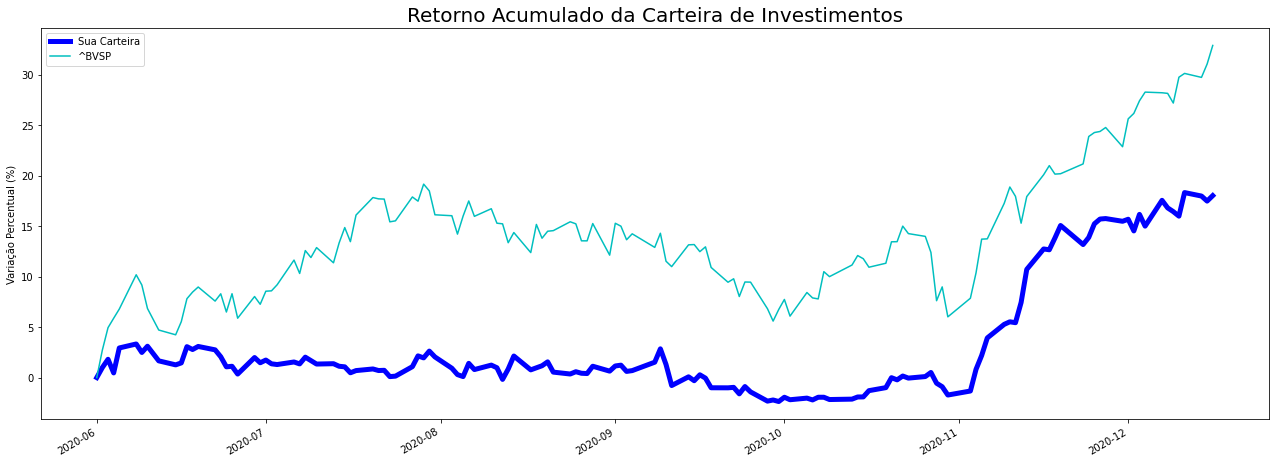

In [102]:
# Visualização das variações da carteira e benchmarks acumulados
cores = ['c','#368B8B','#276666','#276666','#0FA7A7']

tabela_final['Sua Carteira'].plot(color='b',LineWidth=5,figsize=(22,8))
for loc,j in enumerate(benchmarks):
  tabela_final[j].plot(color=cores[loc])
plt.legend()
plt.title ('Retorno Acumulado da Carteira de Investimentos',size=20)
plt.xlabel('')
plt.ylabel('Variação Percentual (%)')
print('')

In [109]:
print('Lista de Resultados da carteira analisada:')
print('')

BaseDados['Soma'] = BaseDados.sum(axis=1)

ret_cart = BaseDados['Soma'].pct_change().mean()*100
risco_cart = BaseDados['Soma'].pct_change().std()*100
linhas = BaseDados['Soma'].pct_change().count()
ret_acum_cart = tabela_final['Sua Carteira'].iloc[linhas]

print(f'Variação diária média da carteira: {round(ret_cart,2)}% a.p.')
print(f'Retorno acumulado da carteira: {round(ret_acum_cart,2)}% a.p.')
print(f'Risco da carteira: {round(risco_cart,2)}% a.p')
if q == 's':
  if '^BVSP' in tabela_final:
    ret_acum_ibov = tabela_final['^BVSP'].iloc[linhas]
    dci = round(((ret_acum_cart/ret_acum_ibov)-1)*100,2)
    print(f'Desempenho em relação ao Ibovespa: {dci}%.')
  else:
    print('')

Lista de Resultados da carteira analisada:

Variação diária média da carteira: 0.14% a.p.
Retorno acumulado da carteira: 18.03% a.p.
Risco da carteira: 0.91% a.p
Desempenho em relação ao Ibovespa: -45.21%.
